###  ***1. Business Understanding***

***What is the goal of this project?***

**This project aims to predict Indofood's stock price (INDF.JK) for the next 3 years using an LSTM (Long Short-Term Memory) model.
These predictions can help with:**

**- Investment decision-making.**

**- Understanding Indofood’s stock trends.**

**- Estimating future price movements.**

### ***2. Data Understanding***
***Where does the data come from?***

**The stock price data is collected from Yahoo Finance using the yfinance library.**

## ***Downloading Indofood Stock Data (2015 - 2023)***

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [33]:
stock_symbol = "INDF.JK"
data = yf.download(stock_symbol, start='2015-01-01', end='2023-01-01')
data = data[['Close']]

[*********************100%***********************]  1 of 1 completed


#### ***📌 Explanation:***

***yf.download()*** **fetches stock price data from 2015 to 2023.**

**Only the Close column is selected, as it represents the daily closing stock price.**

## ***Visualizing Stock Prices***

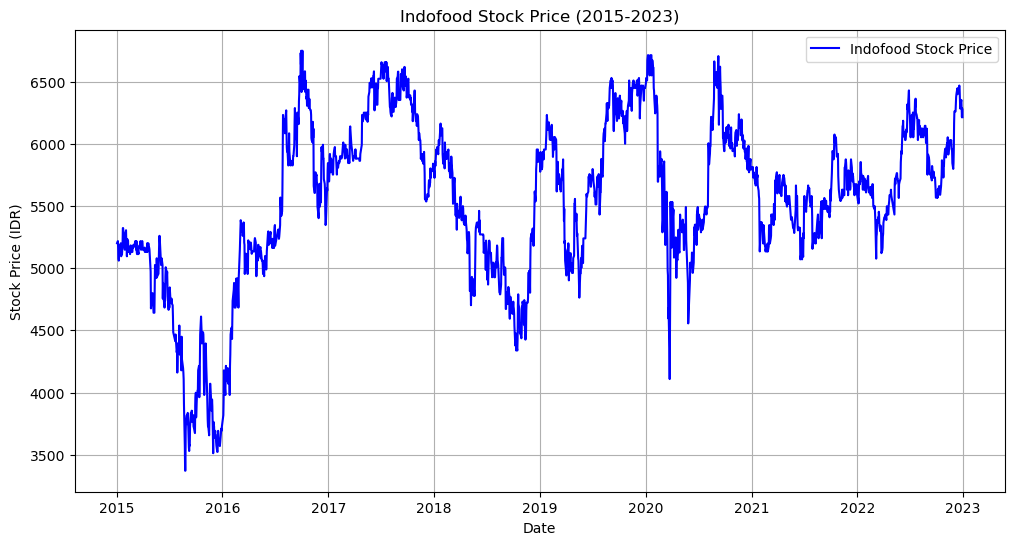

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Indofood Stock Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Stock Price (IDR)')
plt.title('Indofood Stock Price (2015-2023)')
plt.legend()
plt.grid()
plt.show()

#### ***📌 Explanation:***

**The plot helps us understand the stock price trends before modeling.**

### ***3. Data Preparation***

***How is the data prepared for the model?***
                           
**Before training, we need to normalize and create a dataset.**

In [84]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

#### ***📌 Explanation:***

**MinMaxScaler transforms the data to a 0 - 1 range to improve model stability.**

## ***Creating a Time Series Dataset (60 Days Window)***

In [93]:
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

#### ***📌 Explanation:***

**X = Stock prices from the past 60 days.**

**y = The stock price on the 61st day.**

**The model learns from past 60 days to predict the next day’s stock price.**

## ***Splitting Data into Training and Testing Sets***

In [95]:
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

X_train, y_train = create_dataset(train_data, 60)
X_test, y_test = create_dataset(test_data, 60)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

#### ***📌 Explanation:***

**80% of the data is used for training, while 20% is for testing.**

**The data is reshaped to match the LSTM input format.**

### ***4. Modeling***

***How is the predictive model built?***

**We use an LSTM model with 2 LSTM layers and 2 Dense layers.**

In [41]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(60, 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

C:\Users\ivanf\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#### ***📌 Explanation:***

**2 LSTM Layers capture sequential patterns in stock prices.**

**Dense(25) → Fully connected layer with 25 neurons.**
    
**Dense(1) → Output layer for stock price prediction.**

## ***Compiling and Training the Model***

In [43]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=64, epochs=20, verbose=1)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.1089
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0074
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0052
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0044
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0037
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0037
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0036
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0035
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0036
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0031
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0034
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0033
Epoch 13/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0028
Epoch 14/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0033
Epoch 15/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0026
Epoc

#### ***📌 Explanation:***

**Adam Optimizer speeds up learning.**
    
**MSE Loss Function measures the model’s prediction errors.**
    
**batch_size=64, epochs=20 ensures efficient training.**

### ***5. Evaluation***

***How well does the model perform?***

**We use these metrics:**

**MAE (Mean Absolute Error) → Measures absolute error.**

**MSE (Mean Squared Error) → Measures squared error.**

**RMSE (Root Mean Squared Error) → Measures root of squared error.**
    
**R² Score → Measures how well the model explains the variance.**

In [45]:
y_pred = model.predict(X_test)

y_test = np.array(y_test).reshape(-1, 1)
y_pred = np.array(y_pred).reshape(-1, 1)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


C:\Users\ivanf\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [47]:
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

MAE: 0.034206827847564236
MSE: 0.0018075120470979922
RMSE: 0.04251484502027489
R² Score: 0.7679908290767006


#### ***📌 Explanation:***

**Lower error values indicate better predictions.**

### ***6. Deployment***

***How do we use the model for future predictions?***

## ***Predicting 3 Years Ahead (1095 Days)***

In [49]:
future_steps = 1095
last_data = scaled_data[-60:]
predictions = []

In [51]:
for _ in range(future_steps):
    input_data = last_data.reshape(1, 60, 1)
    pred = model.predict(input_data)[0][0]
    predictions.append(pred)
    last_data = np.append(last_data[1:], pred).reshape(60, 1)

predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
future_dates = pd.date_range(start=data.index[-1], periods=future_steps + 1)[1:]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━

#### ***📌 Explanation:***

**Uses the last 60 days to predict 1095 future days (3 years).**

## ***Visualizing the Predictions***

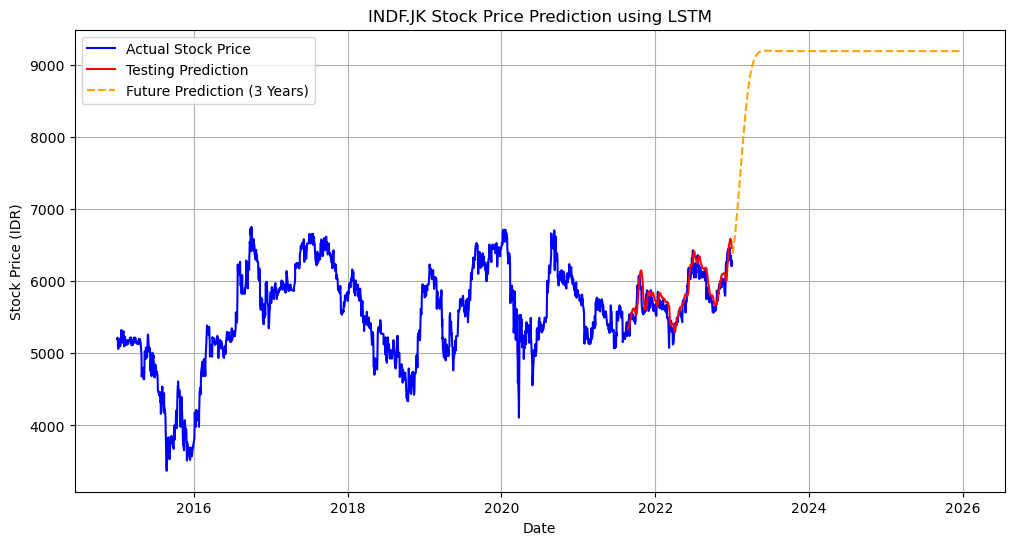

In [53]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, scaler.inverse_transform(scaled_data), label='Actual Stock Price', color='blue')
plt.plot(data.index[-len(y_test):], scaler.inverse_transform(y_pred), label='Testing Prediction', color='red')
plt.plot(future_dates, predictions, label='Future Prediction (3 Years)', color='orange', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Stock Price (IDR)')
plt.title(f'{stock_symbol} Stock Price Prediction using LSTM')
plt.legend()
plt.grid()
plt.show()

#### ***📌 Results:***

**The plot shows the predicted Indofood stock price for the next 3 years!**

## ***Creating a DataFrame***

In [55]:
predicted_df = pd.DataFrame({
    "Date": future_dates,
    "Predicted Price": predictions.flatten()
})

***"Date"*** **Column → Contains the future dates for which predictions were made.**

***"Predicted Price"*** **Column → Stores the predicted stock prices for those future dates.**

***predictions.flatten()*** **→ Converts the NumPy array into a 1D array, ensuring it fits into the DataFrame properly.**

## ***Displaying the First 5 Predictions***

In [57]:
print(predicted_df.head())

        Date  Predicted Price
0 2022-12-31      6399.740234
1 2023-01-01      6390.866699
2 2023-01-02      6392.220215
3 2023-01-03      6400.236328
4 2023-01-04      6412.742188
